In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config IPCompleter.greedy=True

In [3]:
df = pd.read_csv("./advertising.csv")
#df.describe()
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


C:\Users\home\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


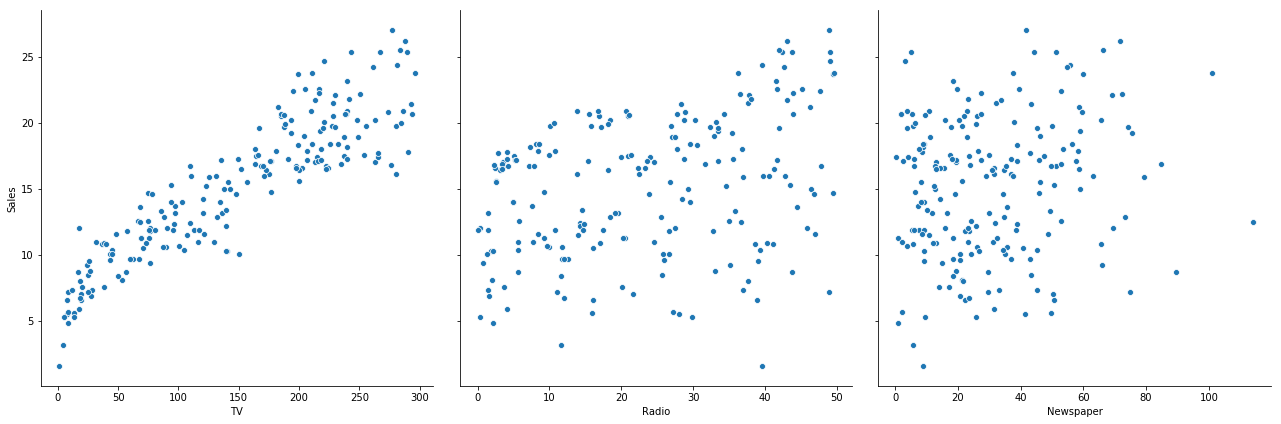

In [5]:
sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars="Sales",size=6,aspect=1)

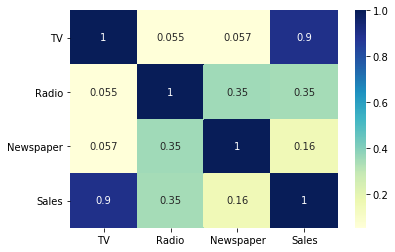

In [6]:
sns.heatmap(df.corr(),cmap='YlGnBu', annot=True)
plt.show()

### Building a linear Model

In [7]:
import statsmodels.api as sm

In [8]:
x = df['TV']
y = df['Sales']

###### now we need to split our data into training and testig sets using importing train_test_split from sklearn.model_selection library. good practice to keep 70% of the data in your training data set and rest in test data set

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [10]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [11]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [12]:
#addign the intercept
x_train_sm = sm.add_constant(x_train)

C:\Users\home\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [13]:
#Fit the regression line using OLS
lr = sm.OLS(y_train,x_train_sm).fit()

In [14]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [15]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 18 May 2019   Prob (F-statistic):           1.52e-52
Time:                        04:32:30   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

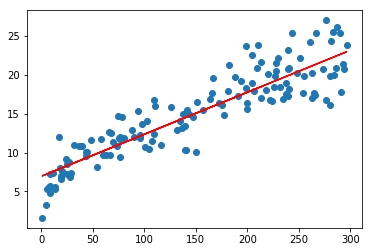

In [17]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.948 + 0.054*x_train,'r')
plt.show()

#### Residual analysis

In [22]:
y_train_pred = lr.predict(x_train_sm)
res = y_train-y_train_pred 

AttributeError: 'function' object has no attribute 'suptitle'

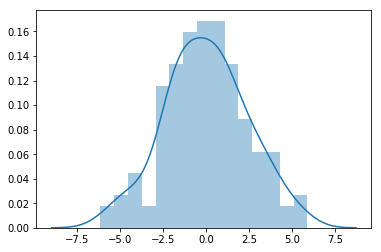

In [30]:
fig = plt.figure
sns.distplot(res,bins=15)
fig.suptitle("Error Terms", fontsize=15)
plt.xlabel('y_train - y_train_pred',fontsize=15)
plt.show()

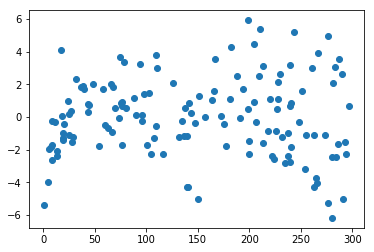

In [32]:
plt.scatter(x_train,res)
plt.show()

In [34]:
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)

In [36]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [39]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.019296008966233

In [41]:
r_squared = r2_score(y_test,y_pred)
r_squared

0.7921031601245658

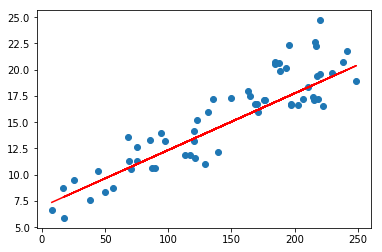

In [42]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.948 + 0.054*x_test,'r')
plt.show()